# Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression. 

Moreover, calculate the accuracy of the model and create a confusion matrix

## Import the relevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [39]:
data = pd.read_csv('data/Bank-data.csv')
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [40]:
data = data.drop(['Unnamed: 0'], axis=1)
data['y'] = data['y'].map({'yes':1,'no':0})

data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [41]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [42]:
x1 = data['duration']
y = data['y']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [43]:
x_ = sm.add_constant(x1)
reg_log1 = sm.Logit(y,x_)
results1 = reg_log1.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:                  0.2121
Time:                        18:28:09   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

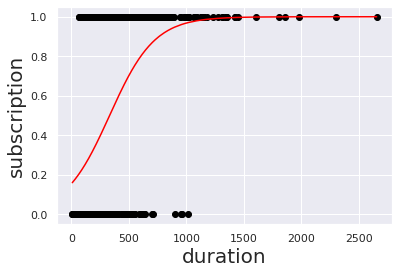

In [44]:
plt.scatter(x1,y,c='black')

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results1.params[0],results1.params[1]))
x_sorted = np.sort(np.array(x1))

plt.plot(x_sorted,f_sorted,c='red')
plt.xlabel('duration', fontsize=20)
plt.ylabel('subscription', fontsize=20)
plt.show()

In [45]:
# using the confusion matrix function later in this notebook

confusion_matrix(x_,y,results1)

(array([[204.,  55.],
        [104., 155.]]),
 0.693050193050193)

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [46]:
x2 = data[['duration', 'interest_rate', 'march', 'credit', 'previous']]

In [47]:
x = sm.add_constant(x2)
reg_log2 = sm.Logit(y,x)
results2 = reg_log2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:                  0.5143
Time:                        18:28:16   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
duration          0.0070      0.001      9.381      0.000       0.006       0.008
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
=================================================================================
"""

### Confusion Matrix

Create the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [48]:
def confusion_matrix(data,actual_values,model):
        '''
        Confusion matrix 
        
        Parameters
        ----------
        data: data frame or array
            data is a data frame formatted in the same way as your input data (without the actual values)
            e.g. const, var1, var2, etc. Order is very important!
        actual_values: data frame or array
            These are the actual values from the test_data
            In the case of a logistic regression, it should be a single column with 0s and 1s
            
        model: a LogitResults object
            this is the variable where you have the fitted model 
            e.g. results_log in this course
        ----------
        '''
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [49]:
confusion_matrix(x,y,results2)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [31]:
new_data = pd.read_csv('data/Bank-data-testing.csv')
new_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [32]:
new_data = new_data.drop(['Unnamed: 0'], axis=1)
new_data['y'] = new_data['y'].map({'yes':1,'no':0})
new_data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [33]:
test_data = new_data.drop(['y'], axis=1)
test_actual = test['y']

In [34]:
x

,const,duration,interest_rate,march,credit,previous
0,1.0,117.0,1.334,1.0,0.0,0.0
1,1.0,274.0,0.767,0.0,0.0,1.0
2,1.0,167.0,4.858,1.0,0.0,0.0
3,1.0,686.0,4.120,0.0,0.0,0.0
4,1.0,157.0,4.856,1.0,0.0,0.0
...,...,...,...,...,...,...
513,1.0,204.0,1.334,1.0,0.0,0.0
514,1.0,806.0,0.861,0.0,0.0,1.0
515,1.0,290.0,0.879,0.0,0.0,0.0
516,1.0,473.0,0.877,0.0,0.0,1.0


In [36]:
test_data = sm.add_constant(test_data)
test_data = test_data[x.columns.values]
test_data

,const,duration,interest_rate,march,credit,previous
0,1.0,487.0,1.313,1.0,0.0,0.0
1,1.0,132.0,4.961,0.0,0.0,0.0
2,1.0,92.0,4.856,1.0,0.0,0.0
3,1.0,1468.0,4.120,0.0,0.0,0.0
4,1.0,36.0,4.963,0.0,0.0,0.0
...,...,...,...,...,...,...
217,1.0,458.0,4.963,0.0,0.0,0.0
218,1.0,397.0,1.264,1.0,0.0,0.0
219,1.0,34.0,1.281,1.0,0.0,0.0
220,1.0,233.0,0.739,0.0,0.0,0.0


Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [37]:
confusion_matrix(test_data,test_actual,results2)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

In [50]:
# accuracy against training data (again for comparison)
confusion_matrix(x,y,results2)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

Looking at the test acccuracy we see a number which is a tiny but lower: 86.04%, compared to 86.29% for train accuracy. 

In general, we always expect the test accuracy to be lower than the train one. If the test accuracy is higher, this is just due to luck.